In [8]:
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.datasets import  fetch_california_housing,load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 神经网络回归

### 获取数据集

In [3]:
data=fetch_california_housing()


In [4]:
data_x=data.data
data_y=data.target
features=data.feature_names

In [5]:
show=pd.DataFrame(data_x,columns=features)

In [6]:
show.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
data_x.shape

(20640, 8)

In [13]:
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.2,random_state=1)

In [89]:
ss=StandardScaler()
ss.fit(train_x)
trans_train_x=ss.transform(train_x)
trans_test_x=ss.transform(test_x)

In [116]:
def evalue(model,x,y):
    y_=model.predict(x)
    print("r2_score: {}\nmae: {}\nmsq: {}".format(r2_score(y,y_),mean_absolute_error(y,y_),mean_squared_error(y,y_)))
    print("layers: {}\titer: {}".format(model.n_layers_,model.n_iter_))
    print("the final loss:{}".format(model.loss_))

In [117]:
model=MLPRegressor(activation="logistic",hidden_layer_sizes=(36,18),random_state=1)
#激活函数sigmoid，两层隐藏层
model.fit(train_x,train_y)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(36, 18), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [118]:
evalue(model,test_x,test_y)

r2_score: 0.6358260014916013
mae: 0.5157028621769157
msq: 0.47768369930675025
layers: 4	iter: 35
the final loss:0.24174757903257485


In [119]:
model=MLPRegressor(activation="logistic",hidden_layer_sizes=(32,16,8,4),random_state=1)
model.fit(trans_train_x,train_y)
evalue(model,trans_test_x,test_y)

r2_score: 0.7349926081732561
mae: 0.41176302731786446
msq: 0.34760776933533044
layers: 6	iter: 92
the final loss:0.16904427002326902


In [120]:
model=MLPRegressor(activation="relu",hidden_layer_sizes=(32,16,8,4),random_state=1)
model.fit(trans_train_x,train_y)
evalue(model,trans_test_x,test_y)

r2_score: 0.7788468279910534
mae: 0.36477736260232957
msq: 0.29008459074877996
layers: 6	iter: 54
the final loss:0.1385841503645178


In [121]:
model=MLPRegressor(activation="tanh",hidden_layer_sizes=(32,16,8,4),random_state=1)
model.fit(trans_train_x,train_y)
evalue(model,trans_test_x,test_y)

r2_score: 0.7814550268175382
mae: 0.35154907363740634
msq: 0.2866634402298913
layers: 6	iter: 72
the final loss:0.13289201732272726


In [125]:
model=MLPRegressor(activation="tanh",hidden_layer_sizes=(64,32,16,8,4),random_state=1)
model.fit(trans_train_x,train_y)
evalue(model,trans_test_x,test_y)

r2_score: 0.7824232389584556
mae: 0.36671607898832775
msq: 0.28539344523002463
layers: 7	iter: 55
the final loss:0.1353953518105646


# 神经网络分类

In [126]:
data=load_wine()
data_x=data.data
data_y=data.target
feature=data.feature_names

In [129]:
data_x.shape

(178, 13)

In [135]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(data_x)
train_x,test_x,train_y,test_y=train_test_split(x_pca,data_y,test_size=0.2,random_state=2)
ss=StandardScaler().fit(train_x)
trans_train_x=ss.transform(train_x)
trans_test_x=ss.transform(test_x)

In [136]:
def evalue_classify(model,x,y):
    y_=model.predict(x)
    print("accuracy_score: {}".format(accuracy_score(y,y_)))
    print("layers: {}\titer: {}".format(model.n_layers_,model.n_iter_))
    print("the final loss:{}".format(model.loss_))

In [146]:
model=MLPClassifier(activation="relu",hidden_layer_sizes=(32,16,8),random_state=2,max_iter=1000)
model.fit(trans_train_x,train_y)
evalue_classify(model,trans_test_x,test_y)

accuracy_score: 0.8611111111111112
layers: 5	iter: 1000
the final loss:0.3052083046552791


/Users/e1ixir/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 可视化

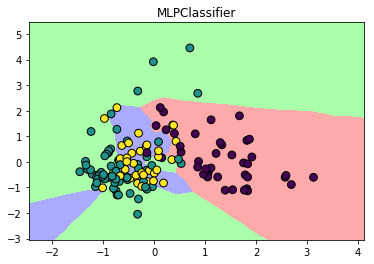

In [153]:
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
camp_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
x_min,x_max=trans_train_x[:,0].min()-1,trans_train_x[:,0].max()+1
y_min,y_max=trans_train_x[:,1].min()-1,trans_train_x[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(trans_train_x[:,0],trans_train_x[:,1],c=train_y,edgecolor='k',s=60)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("MLPClassifier")
plt.show()

### 测试

In [154]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=2)
ss=StandardScaler().fit(x_train)
x_trans_train=ss.transform(x_train)
x_trans_test=ss.transform(x_test)

In [156]:
model=MLPClassifier(activation="relu",hidden_layer_sizes=(32,16,8,4),random_state=2)
model.fit(x_trans_train,y_train)
evalue_classify(model,x_trans_test,y_test)

accuracy_score: 1.0
layers: 6	iter: 200
the final loss:0.016015715437517383


/Users/e1ixir/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [163]:
model=MLPClassifier(activation="logistic",hidden_layer_sizes=(32,16,8),random_state=2,max_iter=1000)
model.fit(x_trans_train,y_train)
evalue_classify(model,x_trans_test,y_test)

accuracy_score: 1.0
layers: 5	iter: 1000
the final loss:0.054224177906052655


/Users/e1ixir/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [164]:
model=MLPClassifier(activation="logistic",hidden_layer_sizes=(32,16,8),random_state=2,max_iter=300)
model.fit(x_trans_train,y_train)
evalue_classify(model,x_trans_test,y_test)

accuracy_score: 0.9444444444444444
layers: 5	iter: 300
the final loss:0.542831873620096


/Users/e1ixir/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [167]:
model=MLPClassifier(activation="tanh",hidden_layer_sizes=(32,16,8),random_state=2,max_iter=200)
model.fit(x_trans_train,y_train)
evalue_classify(model,x_trans_test,y_test)

accuracy_score: 1.0
layers: 5	iter: 200
the final loss:0.07004456918485549


/Users/e1ixir/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [169]:
model.hidden_layer_sizes

(32, 16, 8)